In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ROOT
ROOT.gSystem.Load("/Users/guangyongfu/Software/RooUnfold/build/libRooUnfold.dylib")

import pyroounfold
from pyroounfold.toy_unfold import toy_unfold
from pyroounfold.unfold import unfold
from pyroounfold.plotting import *

As an example, we create an artificial variable to play. In practical application, this can be skipped and start from reading in actual ntuples/rootfiles as pandas.dataframe. 

In [20]:
# Gaussian smearing function
import ROOT

def smear(xt):
    xsmear= ROOT.gRandom.Gaus(-2.5,0.2)
    return xt+xsmear;

df_train = pd.DataFrame(columns=['truth','measured', 'weight'])  # dataframe providing migration matrix, e.g. MC
df_test = pd.DataFrame(columns=['truth','measured', 'weight'])   # dataframe providing distribution to be unfolded, e.g. toy MC, or data as 'measured'


df_train['truth'] = [ ROOT.gRandom.BreitWigner(0.3, 2.5) for x in range(100000)]
df_train['measured'] = smear(df_train['truth'])
df_train['weight'] = 1.

df_test['truth'] = [ ROOT.gRandom.Gaus(0.0, 2.0) for x in range(10000)]
df_test['measured'] = smear(df_test['truth'])
df_test['weight'] = 1.

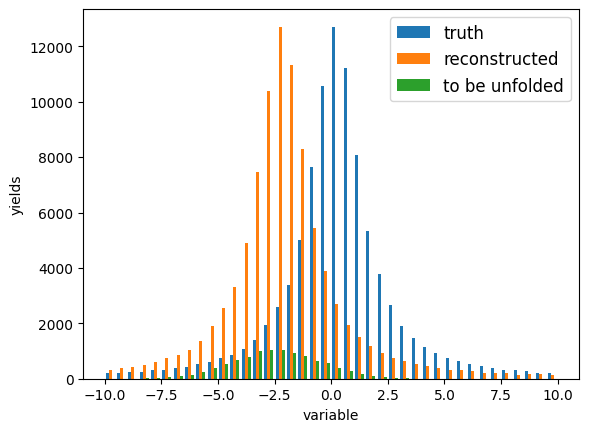

In [3]:
# have a look at the fictional data
my_bins = np.linspace(-10,10,41)

plt.hist([df_train['truth'], df_train['measured'], df_test['measured']], 
         label=['truth', 'reconstructed', 'to be unfolded'], bins = my_bins )
plt.xlabel('variable')
plt.ylabel('yields')
plt.legend(loc='upper right', prop={'size':12})
plt.show()
plt.close()

Let's start with the most simple example. No input bin-wise uncertainty or covariance matrix. The default bin error is square root of the bin count.

In [4]:
# define unfold class with all input

example_a = unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins,
    mc_stat_err = 0
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0) or include (3, default) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.
    )


Now everything needed to launch unfolding is ready !!!

Let's give it a first try, e.g. SVD method with k=0 (default value will be taken by algorithm, i.e. #bins/2)

In [5]:
#example_a.do_Svd(0)
    
example_a.do_Invert()
#example_a.do_BinByBin()

covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error


In [6]:
# unfolded result

example_a.result_df

,bin_index,truth_central,truth_stat_error,measured_central,measured_error,unfolded_central,unfolded_error,coverage_perbin
0,0,0.0,0.000000,3.0,1.732051,0.000000e+00,0.000000e+00,0.000000e+00
1,1,0.0,0.000000,5.0,2.236068,5.396612e-14,4.706661e-15,0.000000e+00
2,2,0.0,0.000000,6.0,2.449490,-1.693088e-15,6.156137e-15,0.000000e+00
3,3,1.0,1.000000,22.0,4.690416,2.021719e-13,1.138422e-14,0.000000e+00
4,4,0.0,0.000000,34.0,5.830952,2.538821e-01,1.700903e-01,0.000000e+00
5,5,3.0,1.732051,47.0,6.855655,3.245455e+00,1.871750e+00,0.000000e+00
6,6,4.0,2.000000,102.0,10.099505,5.046625e+00,2.389380e+00,6.202926e-01
7,7,7.0,2.645751,150.0,12.247449,5.909507e+00,2.549966e+00,6.584653e-01
8,8,22.0,4.690416,254.0,15.937377,2.350518e+01,5.063576e+00,6.084439e-01
9,9,33.0,5.744563,404.0,20.099751,3.446125e+01,6.239113e+00,6.359189e-01


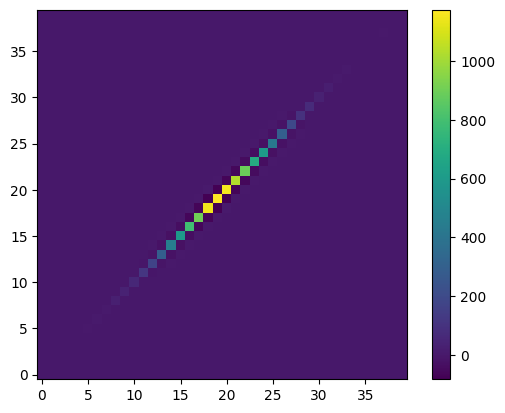

In [7]:
# post-unfold covariance matrix

cov = example_a.result_cov

plt.imshow(cov, origin='lower')
plt.colorbar()
plt.show()

Now we plot the unfolded result comparing with the truth and check the confidence intervals converag, variance and bias for each bin.

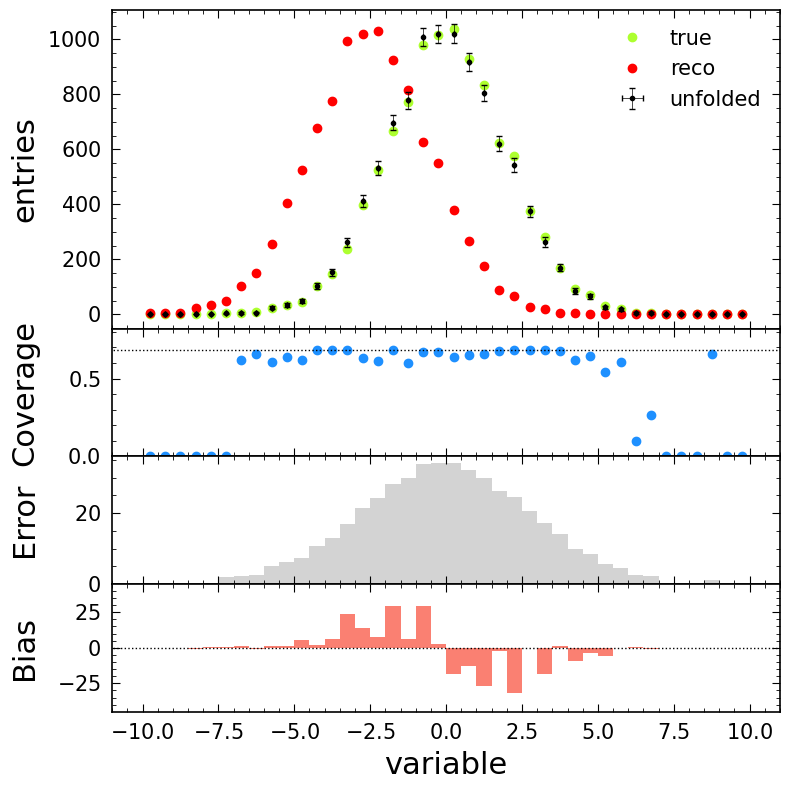

In [8]:
fig = plot_compare_single_run_check(example_a.result_df, my_bins, 'variable', 'entries')

Try other methods..

In [9]:
example_a.do_Svd(30)
unf_cen_svd = example_a.result_df['unfolded_central'].copy()
unf_err_svd = example_a.result_df['unfolded_error'].copy()

example_a.do_Svd(2)
unf_cen_svd_low = example_a.result_df['unfolded_central'].copy()
unf_err_svd_low = example_a.result_df['unfolded_error'].copy()

example_a.do_Invert()
unf_cen_inv = example_a.result_df['unfolded_central'].copy()
unf_err_inv = example_a.result_df['unfolded_error'].copy()

example_a.do_BinByBin()
unf_cen_byb = example_a.result_df['unfolded_central'].copy()
unf_err_byb = example_a.result_df['unfolded_error'].copy()

example_a.do_Bayes(10)
unf_cen_bay = example_a.result_df['unfolded_central'].copy()
unf_err_bay = example_a.result_df['unfolded_error'].copy()

example_a.do_GP()
unf_cen_gp = example_a.result_df['unfolded_central'].copy()
unf_err_gp = example_a.result_df['unfolded_error'].copy()


covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error
covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error
Using response matrix priors
Priors:

Vector (40)  is as follows

     |        1  |
------------------
   0 |0.00211989 
   1 |0.00226121 
   2 |0.00267432 
   3 |0.00257648 
   4 |0.00343531 
   5 |0.00357663 
   6 |0.00420716 
   7 |0.00462027 
   8 |0.00562042 
   9 |0.00667493 
  10 |0.00830561 
  11 |0.00913182 
  12 |0.0115561 
  13 |0.0152306 
  14 |0.0209923 
  15 |0.0279499 
  16 |0.0369295 
  17 |0.0545735 
  18 |0.0829039 
  19 |0.114931 
  20 |0.138108 
  21 |0.121834 
  22 |0.087709 
  23 |0.0580849 
  24 |0.0409736 
  25 |0.0291131 
  26 |0.0207205 
  27 |0.0161438 
  28 |0.0124584 
  29 |0.00997978 
  30 |0.00801209 
  31 |0.00705542 
  32 |0.00580523 
  33 |0.00493553 
  34 |0.00415281 
  35 |0.00353315 
  36 |0.00338095 
  37 |0.00314178 
  38 

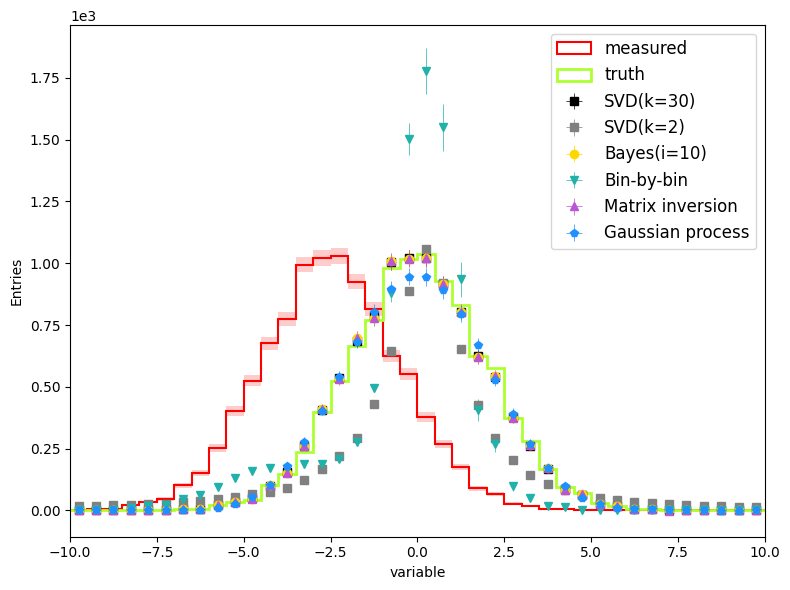

In [10]:
truth_cen = example_a.result_df['truth_central']
measu_cen, measu_err = example_a.result_df['measured_central'], example_a.result_df['measured_error']

f = plt.figure(figsize=(8,6))
plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=measu_cen, histtype='step', lw=1.5, color='red', label='measured')
plt.bar(get_bin_centers(my_bins), height=measu_err*2, width=get_bin_widths(my_bins), bottom=measu_cen - measu_err,
       alpha=0.2, color='red')  

plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=truth_cen, histtype='step', lw=2, color='greenyellow',  label='truth')

plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_svd, yerr=unf_err_svd, xerr=0, marker='s', color='black',ls='', elinewidth=0.5,  label='SVD(k=30)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_svd_low, yerr=unf_err_svd_low, xerr=0, marker='s', color='gray',ls='', elinewidth=0.5, label='SVD(k=2)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_bay, yerr=unf_err_bay, xerr=0, marker='o', color='gold',ls='', elinewidth=0.5,  label='Bayes(i=10)')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_byb, yerr=unf_err_byb, xerr=0, marker='v', color='lightseagreen',ls='', elinewidth=0.5,  label='Bin-by-bin')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_inv, yerr=unf_err_inv, xerr=0, marker='^', color='mediumorchid',ls='', elinewidth=0.5,  label='Matrix inversion')
plt.errorbar(x=get_bin_centers(my_bins), y=unf_cen_gp, yerr=unf_err_gp, xerr=0, marker='p', color='dodgerblue',ls='', elinewidth=0.5,  label='Gaussian process')

plt.xlim(-10,10)
plt.xlabel('variable')
plt.ylabel('Entries')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc=1, prop={'size':12})
plt.tight_layout()
plt.show()
plt.close()
f.savefig('compare_all.pdf')


Some FoM are defined for bias study: 

a -- $\sum_{i}{|b_{i}|}$ 

b -- $\sum_{i}{|b_{i}|/N_{i}^{\text{true}}}$

c -- $\sum_{i}{b_{i}}$ 

d -- $\sqrt{\sum_{i,j}Cov_{i,j}}$

e -- $\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$ 

f -- $\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$ 

g -- $\sum_{i}{|b_{i}|}/\sqrt{Cov_{i,i}}$ 

h -- confidence interval coverage probability $\Phi(\frac{b_i}{\sigma_i} +1) - \Phi(\frac{b_i}{\sigma_i} -1)$

where $b_{i} = N_{i}^{\text{unfolded}} - N_{i}^{\text{true}}$ is the bias in each bin, and $Cov_{i,j}$ is the obtained post-unfold covariance matrix. $\Phi$ is the normal cumulative distribution function.

In [11]:
# calculate all FOM
example_a.do_Svd(28)
example_a.check_bias()

In [12]:
example_a.bias_h

np.float64(0.5783113760731472)

Use toys to compare the FOM obtained with different unfolding method or parameters. 

Toys can be generated from the input measured covariance matrix or bin error. If none of them are provided, a Poisson distrition based on the statistical error of bin count will be used.

In [13]:
# define toy class

example_toy = toy_unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins,
    toy_size = 10  # number of toys
)
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0, default) or include (1) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.

Then, we can use different unfolding mothod for the toys. 

In [14]:
# try matirx inversion method
example_toy.do_toyUnfold(method='Invert',
                         get_fom=True  # include the FOM calculation result
                        ) 
inv_cen = example_toy.result_cen_mean
inv_err = example_toy.result_cen_err
inv_fom = example_toy.dict_fom

/Users/guangyongfu/Software/PyRooUnfold/example/rootenv/lib/python3.12/site-packages/pyroounfold/utils/bias_study.py:58: RuntimeWarning: invalid value encountered in scalar divide
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


In [15]:
# try SVD method with scanning various k parameter

k_arr = np.arange(2, example_toy.nbins+1).tolist()

svd_cen, svd_err, svd_coverage, svd_fom = example_toy.do_toyUnfold_scan(method='Svd', para_arr=k_arr, get_fom=True)

Loop in given parameters......
para = 2
para = 3
para = 4
para = 5
para = 6
para = 7
para = 8
para = 9
para = 10
para = 11
para = 12
para = 13
para = 14
para = 15
para = 16
para = 17
para = 18
para = 19
para = 20
para = 21
para = 22
para = 23
para = 24
para = 25
para = 26
para = 27
para = 28
para = 29
para = 30
para = 31
para = 32
para = 33
para = 34
para = 35
para = 36
para = 37
para = 38
para = 39
para = 40


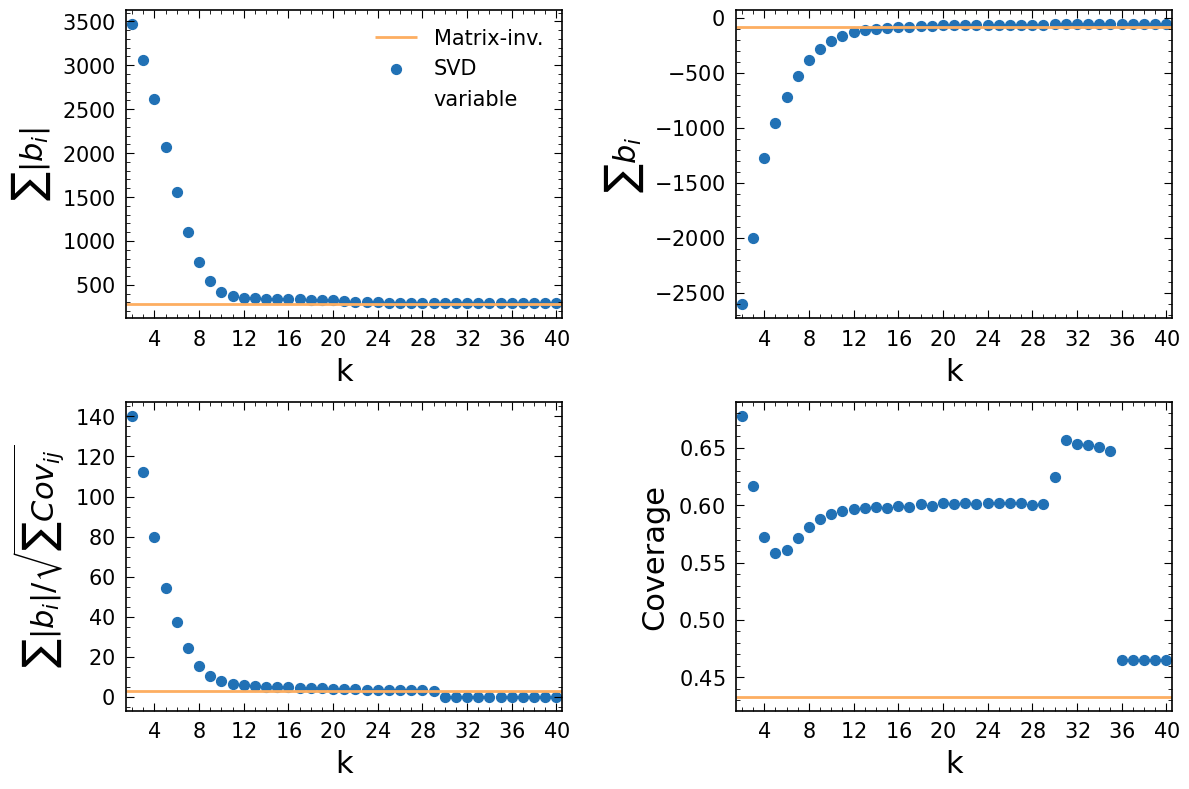

In [16]:
# compare the result
# User can define own plotting function
# Some examples can be found in ./plotting.py

plot_unf_fom_my(k_arr, svd_fom, inv_fom, example_toy.show_var, leg=1) 

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_96138/3707630415.py:5: SyntaxWarning: invalid escape sequence '\s'
  fom_names = ['$\sum_{i}{|b_{i}|}$',
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_96138/3707630415.py:6: SyntaxWarning: invalid escape sequence '\s'
  '$\sum_{i}{|b_{i}|/N_{i}^{true}}$',
/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_96138/3707630415.py:7: SyntaxWarning: invalid escape sequence '\s'
  '$\sqrt{\sum_{i,j}Cov_{i,j}}$',
/var/folders

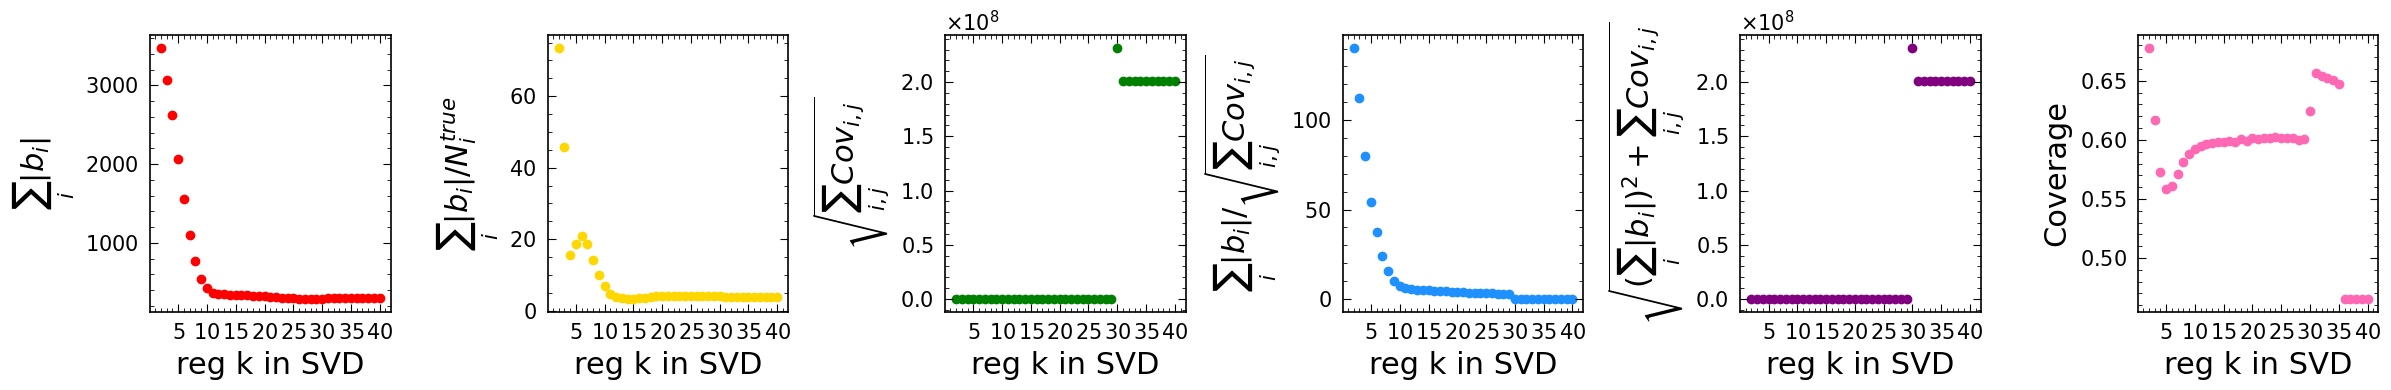

In [17]:
foms    = [svd_fom['fom_a'], svd_fom['fom_b'], svd_fom['fom_d'], svd_fom['fom_e'], svd_fom['fom_f'],svd_fom['fom_h']]

colors    = ['red', 'gold', 'green', 'dodgerblue', 'purple', 'hotpink']

fom_names = ['$\sum_{i}{|b_{i}|}$', 
             '$\sum_{i}{|b_{i}|/N_{i}^{true}}$',
             '$\sqrt{\sum_{i,j}Cov_{i,j}}$',
             '$\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$', 
             '$\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$', 'Coverage' ]

last_k = 40

# plot until last_k
fig_svd_para = plot_compare_para(len(foms), k_arr, 'reg k in SVD', foms, fom_names, colors, 'variable', last_k)
fig_svd_para.savefig('svd_fom.pdf')

In the reality, it would be better to have a look at the response matrix (migration matrix) before actual unfolding, e.g. to get some feeling to improve the binning, where the guidelines include avoiding low stat. bin and bin_width << resolution.

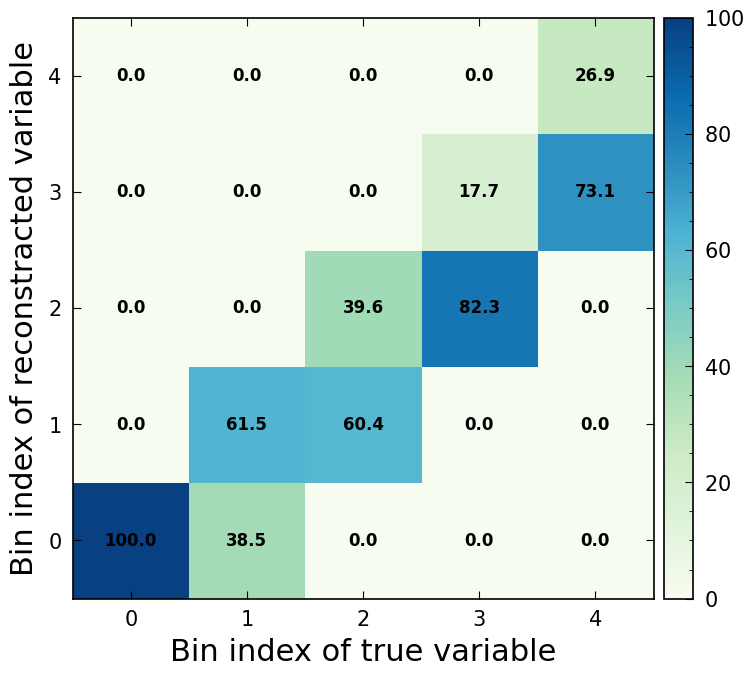

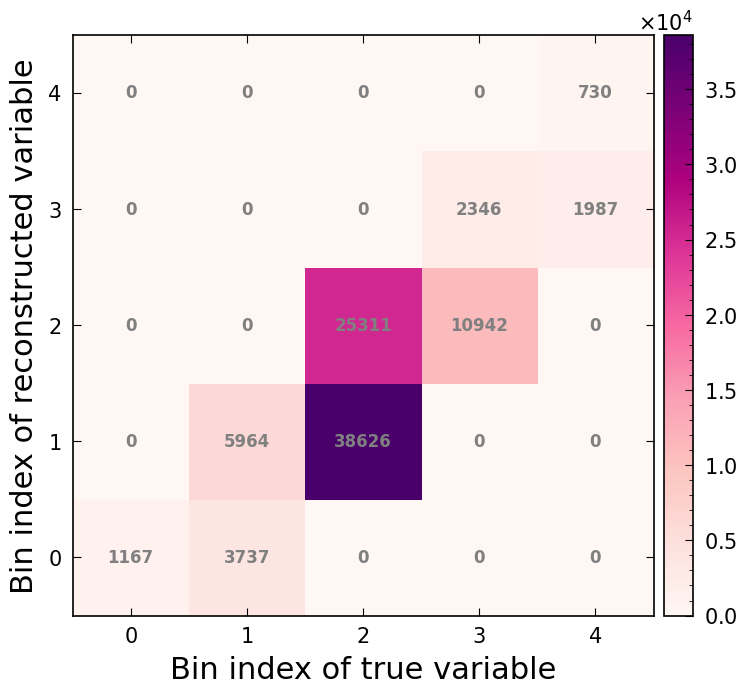

In [18]:
# plot migration matrix and entries matrix

mig_matrix, hist, mig_fig, n_fig = get_migration(
    true_data =df_train['truth'], 
    reco_data =df_train['measured'], 
    weight    =df_train['weight'], 
    bin_var   =np.linspace(-10,10,6), 
    name_var  ='variable')